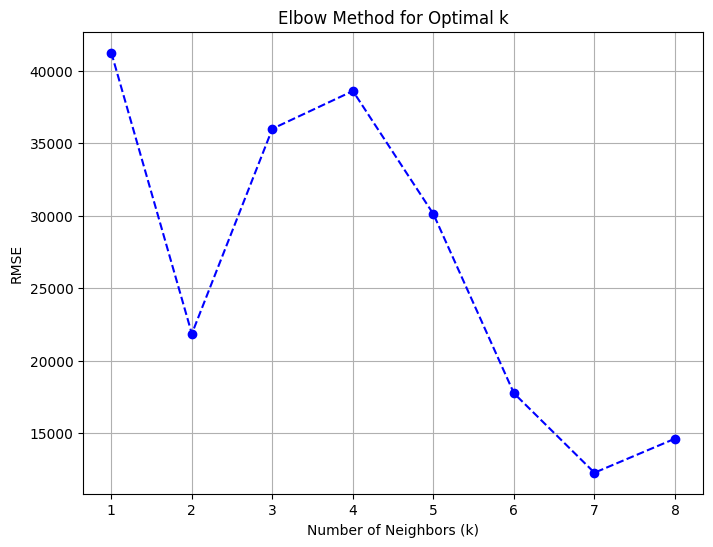

Optimal k chosen using Elbow Method: 7
Final RMSE: 12271.623066534235


In [10]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Load dataset
data = pd.read_csv("your_dataset.csv", encoding="utf-8", delimiter=",")
expected_target = "Price"

if expected_target not in data.columns:
    raise ValueError(f"Target column '{expected_target}' not found. Available columns: {list(data.columns)}")

data = data.apply(pd.to_numeric, errors="coerce")
data.fillna(data.mean(), inplace=True)

X, y = data.drop(columns=[expected_target]), data[expected_target]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure k does not exceed number of training samples
max_k = min(len(X_train), 20)  # Set max_k as minimum of dataset size or 20

scaler = StandardScaler()
X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

# Finding the optimal k using the Elbow Method
error_rates, k_values = [], range(1, max_k + 1)  # Ensure k does not exceed training samples
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k, weights="distance")
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    error_rates.append(mean_squared_error(y_test, y_pred, squared=False))

# Plot the Elbow Method graph
plt.figure(figsize=(8,6))
plt.plot(k_values, error_rates, marker='o', linestyle='dashed', color='b')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("RMSE")
plt.title("Elbow Method for Optimal k")
plt.grid()
plt.show()

optimal_k = k_values[np.argmin(error_rates)]
print(f"Optimal k chosen using Elbow Method: {optimal_k}")

# Train final model with optimal k
knn_final = KNeighborsRegressor(n_neighbors=optimal_k, weights="distance")
knn_final.fit(X_train_scaled, y_train)
y_final_pred = knn_final.predict(X_test_scaled)

# Evaluate final model
final_rmse = mean_squared_error(y_test, y_final_pred, squared=False)
print(f"Final RMSE: {final_rmse}")
